In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('C:\\Users\\Varun Agrawal\\OneDrive\\Desktop\\2016.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [4]:
data.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [5]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [6]:
data['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [7]:
for region in data['Region'].unique():
    print(len(data[data['Region'] == region]), region)

21 Western Europe
2 North America
2 Australia and New Zealand
19 Middle East and Northern Africa
24 Latin America and Caribbean
9 Southeastern Asia
29 Central and Eastern Europe
6 Eastern Asia
38 Sub-Saharan Africa
7 Southern Asia


In [8]:
rows_list=[]
for region in data['Region'].unique():
    happinessRankSum = data.loc[data['Region'] == region]['Happiness Rank'].sum()
    numCountriesInRegion = len(data.loc[data['Region'] == region])
    avgHappinessScorePerRegion = happinessRankSum/numCountriesInRegion;
    dict1 = {'Region': region, 'Happiness Rank Per Region': avgHappinessScorePerRegion, 'numCountriesInRegion': numCountriesInRegion};
    rows_list.append(dict1)

In [9]:
df = pd.DataFrame(rows_list)
df.sort_values(['Happiness Rank Per Region'], ascending=True, inplace=True)
df

,Region,Happiness Rank Per Region,numCountriesInRegion
2,Australia and New Zealand,8.500000,2
1,North America,9.500000,2
0,Western Europe,29.190476,21
4,Latin America and Caribbean,48.333333,24
7,Eastern Asia,67.166667,6
3,Middle East and Northern Africa,78.105263,19
6,Central and Eastern Europe,78.448276,29
5,Southeastern Asia,80.000000,9
9,Southern Asia,111.714286,7
8,Sub-Saharan Africa,129.657895,38


C:\Users\Varun Agrawal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Australia and New Zealand'),
 Text(1, 0, 'North America'),
 Text(2, 0, 'Western Europe'),
 Text(3, 0, 'Latin America and Caribbean'),
 Text(4, 0, 'Eastern Asia'),
 Text(5, 0, 'Middle East and Northern Africa'),
 Text(6, 0, 'Central and Eastern Europe'),
 Text(7, 0, 'Southeastern Asia'),
 Text(8, 0, 'Southern Asia'),
 Text(9, 0, 'Sub-Saharan Africa')]

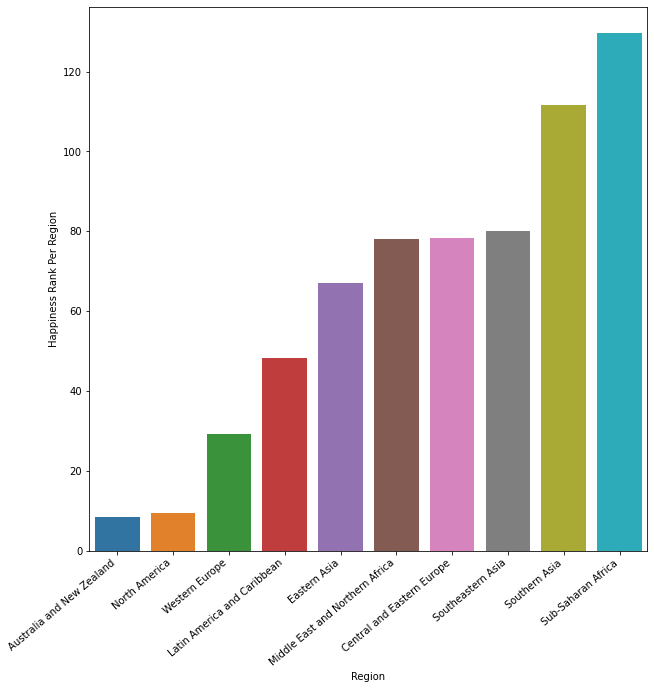

In [10]:
plt.figure(figsize=(10,10))
ax = sns.barplot(df['Region'], df['Happiness Rank Per Region'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")